### Autograd en pytorch

Este ejemplo muestra como calcular los gradientes utilizando PyTorch y su herramienta AutoGrad para un perceptrón simple



z 6.0
y_hat 7.0
e -2.0
L 4.0
Gradients:
dL/dL: 1.0
dL/de: -4.0
dL/dy_hat: -4.0
dL/dz: -4.0
dL/dw = -12.0
dL/db = -4.0


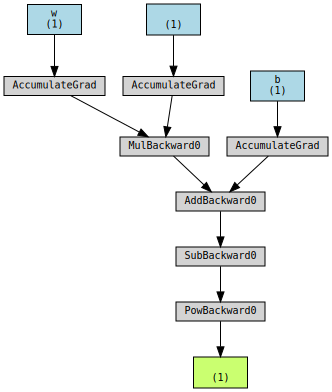

In [29]:
import torch
from torchviz import make_dot

# Create input data
x = torch.tensor([3.0], requires_grad=True)   # Input feature
y_true = torch.tensor([9.0])  # True label

# Create learnable parameters
w = torch.tensor([2.0], requires_grad=True)  # Weight
b = torch.tensor([1.0], requires_grad=True)  # Bias

# Forward pass
z=w*x
print("z", z.item())
z.retain_grad()
y_hat = z + b
print("y_hat", y_hat.item())
y_hat.retain_grad()

# Compute loss (mean squared error)
e = (y_hat - y_true)
e.retain_grad()
print("e", e.item())
l = e ** 2
l.retain_grad()
print("L",l.item())



# Backward pass
l.backward()  # Compute gradients

#print gradients
print("Gradients:")
print('dL/dL:', l.grad.item()) 
print('dL/de:', e.grad.item()) 
print('dL/dy_hat:', y_hat.grad.item()) 
print('dL/dz:', z.grad.item())
print("dL/dw =", w.grad.item())
print("dL/db =", b.grad.item())

# Visualize the computational graph and view partial derivatives
dot = make_dot(l, params={"w": w, "b": b})
dot.render(filename="computational_graph", format="png")

dot
